In [188]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np

In [189]:
file = '../Resources/2013_Expenditures_Contributions_Merge.csv'
IC_2013 = pd.read_csv(file,index_col=False)
uncleaned = pd.read_csv(file,index_col=False)
IC_2013.head()

,Election,CandidateID,CandidateName,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,PrevAmt,TotalAmount,ExpenditureAmount,PurposeCode,Purpose
0,2013,1752,"Abiodun,Laurel-Smith",9/7/2013,Corporation,New York,NY,10001,0.0,0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",1/17/2012,Corporation,New York,NY,10019,0.0,0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",7/12/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",4/15/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",7/8/2013,Limited Liability Company,New York,NY,10018,0.0,0,0.0,0.0,57,Other,Other: explntion


In [190]:
IC_2013['ZipCode'] = IC_2013['ZipCode'].apply(str)
# IC_2013['Date'] = pd.to_datetime(IC_2013['Date'])
IC_2013.dropna()

,Election,CandidateID,CandidateName,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,PrevAmt,TotalAmount,ExpenditureAmount,PurposeCode,Purpose
0,2013,1752,"Abiodun,Laurel-Smith",9/7/2013,Corporation,New York,NY,10001,0.0,0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",1/17/2012,Corporation,New York,NY,10019,0.0,0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",7/12/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",4/15/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",7/8/2013,Limited Liability Company,New York,NY,10018,0.0,0,0.0,0.0,57,Other,Other: explntion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13155,2013,FI,"John,Liu",3/23/2012,Other,New York,NY,10036,0.0,0,0.0,0.0,17861,Professional Services,Prof. Srvcs.
13156,2013,FI,"John,Liu",4/11/2012,Other,New York,NY,10036,0.0,0,0.0,0.0,23053,Professional Services,Prof. Srvcs.
13157,2013,FI,"John,Liu",5/3/2012,Other,New York,NY,10036,0.0,0,0.0,0.0,14896,Professional Services,Prof. Srvcs.
13158,2013,FI,"John,Liu",1/2/2013,Other,New York,NY,10036,0.0,0,0.0,0.0,50000,Professional Services,Prof. Srvcs.


In [191]:
IC_2013_df = IC_2013.drop(columns=['Election','PrevAmt'])
total_groupby = IC_2013_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby 

,Amount,MatchAmt,TotalAmount,ExpenditureAmount
CandidateName,,,,
"de Blasio, Bill",11073226.59,926504,1.497036e+07,0
"Quinn, Christine C",6096021.97,527421,9.427039e+06,0
"Thompson, Jr., William C",4911412.70,417722,6.111452e+06,0
"Liu, John C",239200.00,0,4.045000e+05,0
"Weiner, Anthony D",225088.74,0,2.301887e+05,0
"Lhota, Joseph J",41414.00,0,4.141400e+04,0
"Albanese, Sal F",27178.00,0,3.092800e+04,0
"Hidary, Jack D",1500.00,0,2.500000e+03,0
"Salgado, Erick J",675.00,0,6.750000e+02,0


In [192]:
IC_2013_df = IC_2013_df.groupby(['ZipCode','Date','ContributerType','City','State']).sum('TotalAmount')

In [193]:
IC_2013_df

Amount  MatchAmt  \
ZipCode Date       ContributerType City      State                     
00901   1/17/2012  Corporation     San Juan  PR        0.0         0   
00907   10/24/2011 Corporation     San Juan  PR        0.0         0   
        11/14/2011 Corporation     San Juan  PR        0.0         0   
        11/7/2013  Corporation     San Juan  PR        0.0         0   
        12/11/2013 Corporation     San Juan  PR        0.0         0   
...                                                    ...       ...   
nan     9/5/2013   Corporation     New York  NY        0.0         0   
        9/6/2013   Corporation     New York  NY        0.0         0   
        9/7/2012   Corporation     Charlotte NC        0.0         0   
        9/8/2011   Corporation     Salt Lake UT        0.0         0   
        9/9/2013   Corporation     Portland  OR        0.0         0   

                                                    TotalAmount  \
ZipCode Date       ContributerType City      State                
00901   1/17/2012  Corporation     San Juan  PR             0.0   
00907   10/24/2011 Corporation     San Juan  PR             0.0   
        11/14/2011 Corporation     San Juan  PR             0.0   
        11/7/2013  Corporation     San Juan  PR             0.0   
        12/11/2013 Corporation     San Juan  PR             0.0   
...                                                         ...   
nan     9/5/2013   Corporation     New York  NY             0.0   
        9/6/2013   Corporation     New York  NY             0.0   
        9/7/2012   Corporation     Charlotte NC             0.0   
        9/8/2011   Corporation     Salt Lake UT             0.0   
        9/9/2013   Corporation     Portland  OR             0.0   

                                                    ExpenditureAmount  
ZipCode Date       ContributerType City      State                     
00901   1/17/2012  Corporation     San Juan  PR                   644  
00907   10/24/2011 Corporation     San Juan  PR                   186  
        11/14/2011 Corporation     San Juan  PR                   188  
        11/7/2013  Corporation     San Juan  PR                  1281  
        12/11/2013 Corporation     San Juan  PR                  -256  
...                                                               ...  
nan     9/5/2013   Corporation     New York  NY                 26958  
        9/6/2013   Corporation     New York  NY                    25  
        9/7/2012   Corporation     Charlotte NC                    39  
        9/8/2011   Corporation     Salt Lake UT                   466  
        9/9/2013   Corporation     Portland  OR                    43  

[29474 rows x 4 columns]

In [194]:
IC_2013_df = IC_2013_df.reset_index()
IC_2013_df.head()
IC_2013_df.isnull().sum()

ZipCode              0
Date                 0
ContributerType      0
City                 0
State                0
Amount               0
MatchAmt             0
TotalAmount          0
ExpenditureAmount    0
dtype: int64

In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
IC_2013_df_enc = IC_2013_df.copy()
le = LabelEncoder()
IC_2013_df_enc['Date'] = le.fit_transform(IC_2013_df['Date'])
IC_2013_df_enc['ContributerType'] = le.fit_transform(IC_2013_df['ContributerType'])
IC_2013_df_enc['City'] = le.fit_transform(IC_2013_df['City'])
# IC_2013_df_enc['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df_enc['State'] = le.fit_transform(IC_2013_df['State'])
IC_2013_df_enc['ZipCode'] = le.fit_transform(IC_2013_df['ZipCode'])
# IC_2013_df_enc['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
# IC_2013_df_enc[features] = scaler.fit_transform(IC_2013_df_enc[features])
IC_2013_df_enc = IC_2013_df_enc.dropna()
IC_2013_df_enc.head()

,ZipCode,Date,ContributerType,City,State,Amount,MatchAmt,TotalAmount,ExpenditureAmount
0,0,31,4,1583,61,0.0,0,0.0,644
1,1,183,4,1583,61,0.0,0,0.0,186
2,1,260,4,1583,61,0.0,0,0.0,188
3,1,340,4,1583,61,0.0,0,0.0,1281
4,1,363,4,1583,61,0.0,0,0.0,-256


In [196]:
X = IC_2013_df_enc.drop('TotalAmount',axis = 1)
y = IC_2013_df_enc['TotalAmount']

In [197]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [199]:
regr = RandomForestRegressor()

In [200]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [201]:
y_pred = regr.predict(X_test)
print(y_pred)

[412.21   0.     0.   ...   0.   646.5    0.  ]


In [202]:
pred_df = X_test
print(X_test.isna().sum())
# pred_df['TotalAmount'] = y_pred
# pred_df.isnull().count()

ZipCode              0
Date                 0
ContributerType      0
City                 0
State                0
Amount               0
MatchAmt             0
ExpenditureAmount    0
dtype: int64


In [203]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,ContributerType,City,State,Amount,MatchAmt,ExpenditureAmount,Predicted Total Amount
ZipCode,,,,,,,,
1,260,4,1583,61,0.0,0,188,0.00
3,971,5,29,33,40.0,0,0,73.59
4,1400,5,1224,51,150.0,0,0,572.32
5,1263,4,309,33,0.0,0,21,0.00
6,160,5,1269,33,100.0,0,0,115.50


In [204]:
pred_df.isnull().sum()

ZipCode                   0
Date                      0
ContributerType           0
City                      0
State                     0
Amount                    0
MatchAmt                  0
ExpenditureAmount         0
Predicted Total Amount    0
dtype: int64

<BarContainer object of 8843 artists>

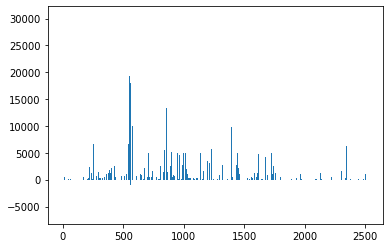

In [205]:
import matplotlib.pyplot as plt
plt.bar(X_test['ZipCode'],y_pred, )

In [210]:
# X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_test

,ZipCode,Date,ContributerType,City,State,Amount,MatchAmt,ExpenditureAmount,Predicted Total Amount
26658,1589,1174,5,444,64,200.00,0,0,412.210000
1470,290,1322,4,1227,47,0.00,0,101,0.000000
12013,642,1214,1,1725,51,0.00,0,238,0.000000
26727,1609,1071,5,55,20,1000.00,0,0,1145.500000
7031,557,315,5,1224,51,1500.00,350,0,2101.850000
...,...,...,...,...,...,...,...,...,...
10064,573,665,5,1224,51,250.00,0,0,794.910000
19192,853,82,5,217,51,2333.33,0,0,4326.982349
19630,856,306,4,217,51,0.00,0,1392,0.000000
14368,756,1057,5,210,51,350.00,0,0,646.500000


In [207]:
X_grid = X_grid.reshape((len(X_grid), 1))

In [208]:
plt.plot(X_grid, regr.predict(X_grid), 
         color = 'green') 

ValueError: X has 1 features, but DecisionTreeRegressor is expecting 8 features as input.